# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Sofi Zamzanah
- **Email:** a406xbm467@devacademy.id
- **ID Dicoding:** a406xbm467

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : bagaimana tren jumlah penyewaan sepeda per bulan?
- Pertanyaan 2 : bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?
- Pertanyaan 3 : bagaimana distribusi jumlah penyewa sepeda per musim (season)? (clustering)
- Pertanyaan 4 : bagaimana distribusi jumlah penyewa sepeda per hari? (clustering)

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_bike_day = pd.read_csv('data/day.csv')
print("\nDaftar kolom pada df_bike_day:")
print("\n".join([f"- {column}" for column in df_bike_day.columns]))
# df_bike_day.head(5)

df_bike_hour = pd.read_csv('data/hour.csv')
print("\nDaftar kolom pada df_bike_hour:")
print("\n".join([f"- {column}" for column in df_bike_hour.columns]))
# df_bike_hour.head(5)


Daftar kolom pada df_bike_day:
- instant
- dteday
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt

Daftar kolom pada df_bike_hour:
- instant
- dteday
- season
- yr
- mnth
- hr
- holiday
- weekday
- workingday
- weathersit
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt


**Insight:**
- Dari kedua dataset yang tersedia, dapat diketahui data penyewaan sepeda pada tanggal tertentu
- Perbedaan df_bike_day dan df_bike_hour hanya terletak pada kolom hr di dataset df_bike_day

### Assessing Data

In [3]:
def check_dataset(df, name, dup_columns):
    print("-" * 40)
    print(f"{name}:")
    print("\n- Informasi dataset:")
    print(df.info())
    print("\n- Missing values per kolom:")
    print(df.isnull().sum())
    print(f"\n- Jumlah data duplikat berdasarkan {dup_columns}:")
    print(df.duplicated(subset=dup_columns).sum())
    print()

# Menampilkan informasi umum masing-masing dataset
check_dataset(df_bike_day, "Dataset df_bike_day", ['dteday'])
check_dataset(df_bike_hour, "Dataset df_bike_hour", ['dteday', 'hr'])

----------------------------------------
Dataset df_bike_day:

- Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

- M

**Insight:**
- Tidak ditemukan missing value pada kedua dataset
- Tidak ditemukan duplicate data pada kedua dataset yang didasarkan pada kolom dteday (dan juga kolom hr pada dataset df_bike_hour)

In [4]:
# Explore Distribusi Nilai Kategori
print("- Distribusi nilai kategori df_bike_day:")
kategori_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in kategori_cols:
    print(f"{col}: {df_bike_day[col].unique()}")

print("\n- Distribusi nilai kategori df_bike_hour:")
kategori_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in kategori_cols:
    print(f"{col}: {df_bike_hour[col].unique()}")

- Distribusi nilai kategori df_bike_day:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]

- Distribusi nilai kategori df_bike_hour:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [1 2 3 4]


In [5]:
# Explore Validasi Kolom Tahun
def validate_year_column(df, name):
    print(f"\n- Validasi tahun pada kolom yr dengan tahun pada kolom dteday {name}:")
    df['year_from_dteday'] = pd.to_datetime(df['dteday']).dt.year
    df['yr_actual'] = df['yr'].astype(int) + 2011
    mismatch = df[df['year_from_dteday'] != df['yr_actual']]
    print(mismatch.index)

# Validasi tahun pada kolom yr dengan tahun pada kolom dteday
validate_year_column(df_bike_day, "df_bike_day")
validate_year_column(df_bike_hour, "df_bike_hour")


- Validasi tahun pada kolom yr dengan tahun pada kolom dteday df_bike_day:
Index([], dtype='int64')

- Validasi tahun pada kolom yr dengan tahun pada kolom dteday df_bike_hour:
Index([], dtype='int64')


**Insight:**
- Tidak ditemukan invalid value pada kolom dengan nilai kategori pada kedua dataset
- Tidak ditemukan mismatch pada tahun dari kolom yr dengan tahun dari kolom dteday

### Cleaning Data

In [6]:
# Menghapus duplikasi jika ada
df_bike_day = df_bike_day.drop_duplicates(subset=['dteday'])
df_bike_hour = df_bike_hour.drop_duplicates(subset=['dteday', 'hr'])

# Mengonversi kolom tanggal ke tipe datetime
df_bike_day['dteday'] = pd.to_datetime(df_bike_day['dteday'])
df_bike_hour['dteday'] = pd.to_datetime(df_bike_hour['dteday'])

# Mengonversi beberapa kolom menjadi kategori untuk efisiensi memori
categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    df_bike_day[col] = df_bike_day[col].astype('category')
    df_bike_hour[col] = df_bike_hour[col].astype('category')

# Menampilkan ringkasan setelah cleaning
def check_cleaning(df, name):
    print('-'*40)
    print(f'{name}:')
    print("\n- Missing values:")
    print(df.isnull().sum())
    print("\n- Info dataset:")
    print(df.info())
    print()

check_cleaning(df_bike_day, "Dataset df_bike_day")
check_cleaning(df_bike_hour, "Dataset df_bike_hour")

----------------------------------------
Dataset df_bike_day:

- Missing values:
instant             0
dteday              0
season              0
yr                  0
mnth                0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                 0
windspeed           0
casual              0
registered          0
cnt                 0
year_from_dteday    0
yr_actual           0
dtype: int64

- Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dteday            731 non-null    datetime64[ns]
 2   season            731 non-null    category      
 3   yr                731 non-null    int64         
 4   mnth              731 non-null    int64         
 5   holid

**Insight:**
- Penghapusan duplikasi data sudah dilakukan (jika ada)
- Kolom tanggal sudah dikonversi ke tipe datetime
- Beberapa kolom dengan data kategori sudah dikonversi menjadi tipe category

## Exploratory Data Analysis (EDA)

### Explore Statistik Dasar

In [7]:
print("- Statistik dasar df_bike_day:")
print(df_bike_day.describe())

print("\n- Statistik dasar df_bike_hour:")
print(df_bike_hour.describe())

- Statistik dasar df_bike_day:
          instant               dteday          yr        mnth        temp  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.495385   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.059130   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.337083   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.498333   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.655417   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    0.861667   
std    211.165812                  NaN    0.500342    3.451913    0.183051   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean     0.474354    0.627894    0.190486   848.176471  3656.172367   
min      0.079070    0.000000    0.022392     2.00000

### Analisis korelasi data

In [8]:
# Jumlah penyewaan perbulan
month_names = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
monthly_counts = (
    df_bike_day.groupby('mnth')[['registered', 'cnt']].sum()
    .rename(columns={'registered': 'Registered Users', 'cnt': 'Total Rental Bikes'})
)
monthly_counts.index = monthly_counts.index.map(month_names)
print (monthly_counts)

      Registered Users  Total Rental Bikes
mnth                                      
Jan             122891              134933
Feb             136389              151352
Mar             184476              228920
Apr             208292              269094
May             256401              331686
Jun             272436              346342
Jul             266791              344948
Aug             279155              351194
Sep             275668              345991
Oct             262592              322352
Nov             218228              254831
Dec             189343              211036


In [9]:
# Jumlah penyewaan pehari
day_names = {
    0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun" 
}
daily_counts = (
    df_bike_day.groupby('weekday', observed=True)[['registered', 'cnt']].sum()
    .rename(columns={'registered': 'Registered Users', 'cnt': 'Total Rental Bikes'})
)
daily_counts.index = daily_counts.index.map(day_names)
print (daily_counts)

         Registered Users  Total Rental Bikes
weekday                                      
Mon                303506              444027
Tue                384719              455503
Wed                411266              469109
Thu                415729              473048
Fri                423935              485395
Sat                409552              487790
Sun                323955              477807


In [10]:
# Rata-rata penyewaan perjam
hourly_counts = df_bike_hour.groupby('hr')['cnt'].mean()
print(hourly_counts)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [11]:
# Jumlah penyewaan permusim
season_names = {
    1: "springer", 2: "summer", 3: "fall", 4: "winter" 
}
season_counts = (
    df_bike_day.groupby('season', observed=True)[['registered', 'cnt']].sum()
    .rename(columns={'registered': 'Registered Users', 'cnt': 'Total Rental Bikes'})
)
season_counts.index = season_counts.index.map(season_names)
print (season_counts)

          Registered Users  Total Rental Bikes
season                                        
springer            410726              471348
summer              715067              918589
fall                835038             1061129
winter              711831              841613


**Insight:**
- Terdapat tren dari jumlah penyewaan sepeda perbulan dan pola pada rata-rata penyewaan per jam
- Waktu, hari, bulan, dan musim mempengaruhi jumlah penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: bagaimana tren jumlah penyewaan sepeda per bulan?

Urutan bulan berdasarkan jumlah penyewaan terbanyak: 
- Aug : 351194 unit
- Jun : 346342 unit
- Sep : 345991 unit
- Jul : 344948 unit
- May : 331686 unit
- Oct : 322352 unit
- Apr : 269094 unit
- Nov : 254831 unit
- Mar : 228920 unit
- Dec : 211036 unit
- Feb : 151352 unit
- Jan : 134933 unit



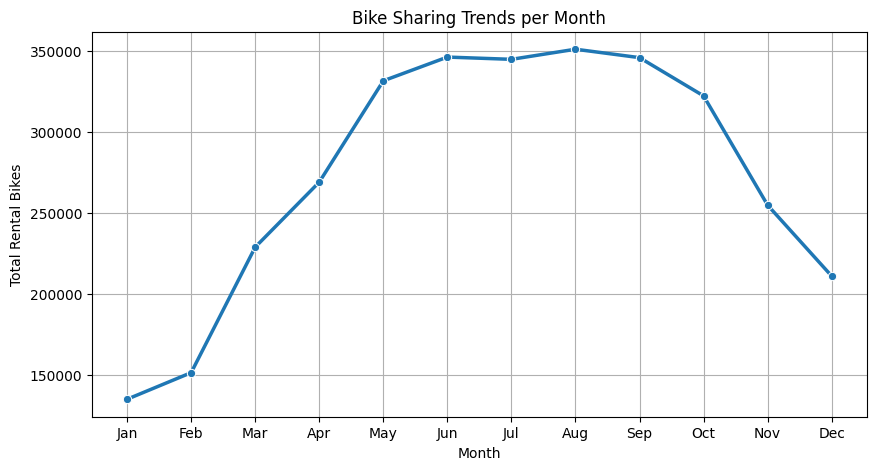

In [12]:
# Print urutan bulan berdasarkan jumlah penyewaan terbanyak
monthly_counts_sorted = monthly_counts[['Total Rental Bikes']].sort_values(by='Total Rental Bikes', ascending=False)

print("Urutan bulan berdasarkan jumlah penyewaan terbanyak: ")
for month, count in monthly_counts_sorted['Total Rental Bikes'].items():
    print(f"- {month} : {count} unit")
print()

# Plot data jumlah penyewaan per bulan
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts['Total Rental Bikes'], marker='o', linewidth=2.5)
plt.xlabel("Month")
plt.ylabel("Total Rental Bikes")
plt.title("Bike Sharing Trends per Month")
plt.grid(True)
plt.show()

**Insight:**
- 3 bulan paling banyak dilakukannya penyewaan sepeda adalah pada bulan Agustus, Juni, dan September
- 3 bulan paling sedikit dilakukannya penyewaan sepeda adalah pada bulan Januari, Februari, dan Desember

### Pertanyaan 2: bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?

Urutan jam berdasarkan rata-rata penyewaan terbanyak:
- 17:00 : 461.45 unit
- 18:00 : 425.51 unit
- 08:00 : 359.01 unit
- 16:00 : 311.98 unit
- 19:00 : 311.52 unit
- 13:00 : 253.66 unit
- 12:00 : 253.32 unit
- 15:00 : 251.23 unit
- 14:00 : 240.95 unit
- 20:00 : 226.03 unit
- 09:00 : 219.31 unit
- 07:00 : 212.06 unit
- 11:00 : 208.14 unit
- 10:00 : 173.67 unit
- 21:00 : 172.31 unit
- 22:00 : 131.34 unit
- 23:00 : 87.83 unit
- 06:00 : 76.04 unit
- 00:00 : 53.90 unit
- 01:00 : 33.38 unit
- 02:00 : 22.87 unit
- 05:00 : 19.89 unit
- 03:00 : 11.73 unit
- 04:00 : 6.35 unit



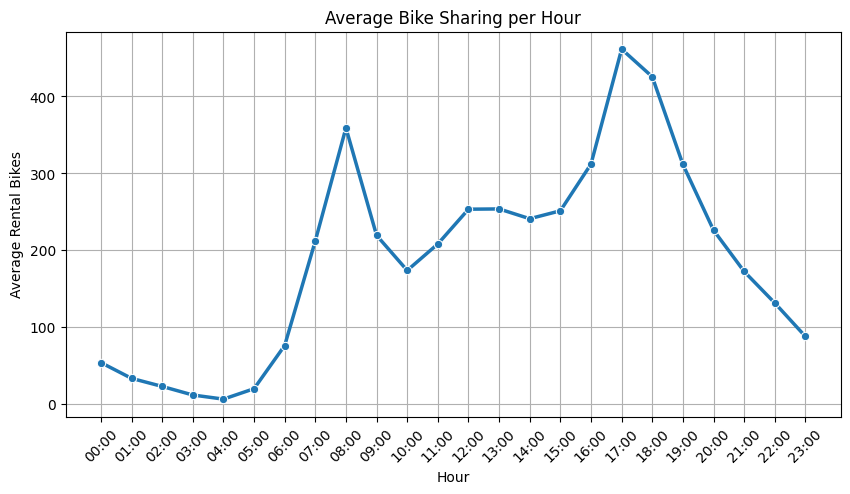

In [13]:
# Print urutan jam berdasarkan rata-rata penyewaan tertinggi
hourly_counts_sorted = hourly_counts.sort_values(ascending=False)

print("Urutan jam berdasarkan rata-rata penyewaan terbanyak:")
for hour, count in hourly_counts_sorted.items():
    print(f"- {hour:02d}:00 : {count:.2f} unit")
print()

# Plot data jumlah penyewaan per jam
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', linewidth=2.5)
plt.xticks(range(0, 24), labels=[f"{h:02d}:00" for h in range(0, 24)], rotation=45)
plt.xlabel("Hour")
plt.ylabel("Average Rental Bikes")
plt.title("Average Bike Sharing per Hour")
plt.grid(True)
plt.show()


**Insight:**
- 3 waktu paling banyak dilakukannya penyewaan sepeda adalah pada pukul 17:00, 18:00, dan 08:00
- 3 waktu paling sedikit dilakukannya penyewaan sepeda adalah pada pukul 04:00, 03:00, dan 05:00

## Analisis Lanjutan (Opsional)

### Pertanyaan 3 : bagaimana distribusi jumlah penyewa sepeda per musim (season)? (clustering)

Urutan musim berdasarkan jumlah penyewaan terbanyak: 
- fall : 1061129 unit
- summer : 918589 unit
- winter : 841613 unit
- springer : 471348 unit



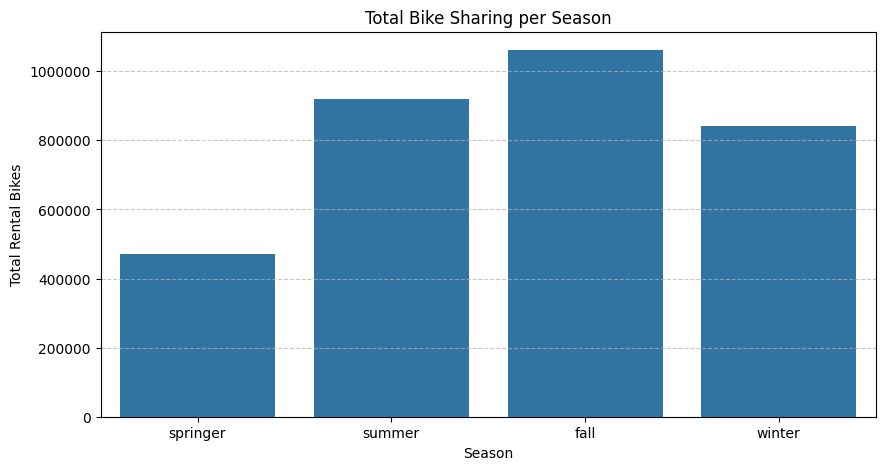

In [14]:
season_counts_sorted = season_counts[['Total Rental Bikes']].sort_values(by='Total Rental Bikes', ascending=False)

print("Urutan musim berdasarkan jumlah penyewaan terbanyak: ")
for season, count in season_counts_sorted['Total Rental Bikes'].items():
    print(f"- {season} : {count} unit")
print()

# Plot data jumlah penyewaan per bulan
plt.figure(figsize=(10, 5))
sns.barplot(x=season_counts.index, y=season_counts['Total Rental Bikes'], color="#1f77b4")
plt.xlabel("Season")
plt.ylabel("Total Rental Bikes")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Total Bike Sharing per Season")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Penyewaan sepeda dapat dikelompokkan (clustering) berdasarkan musim yang terjadi
- Musim dengan penyewaan terbanyak terjadi pada musim gugur
- Musim dengan penyewaan paling sedikit terjadi pada musim semi

### Pertanyaan 4 : bagaimana distribusi jumlah penyewa sepeda per hari? (clustering)

Urutan musim berdasarkan jumlah penyewaan terbanyak: 
- Sat : 487790 unit
- Fri : 485395 unit
- Sun : 477807 unit
- Thu : 473048 unit
- Wed : 469109 unit
- Tue : 455503 unit
- Mon : 444027 unit



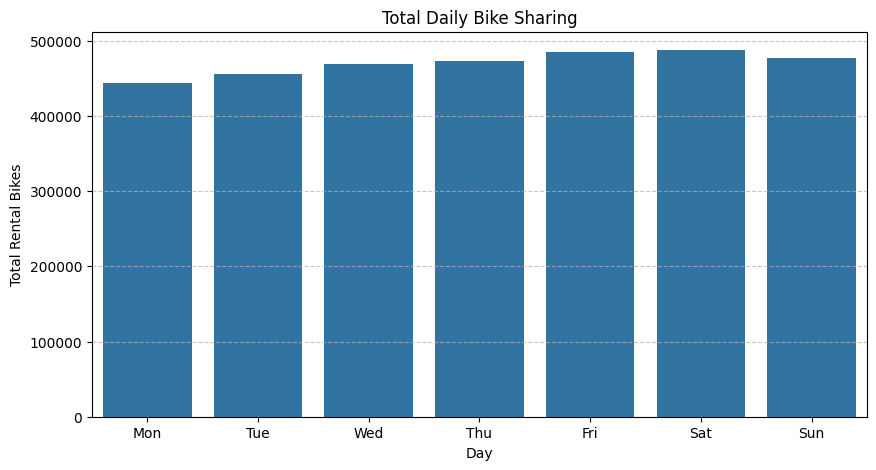

In [15]:
daily_counts_sorted = daily_counts[['Total Rental Bikes']].sort_values(by='Total Rental Bikes', ascending=False)

print("Urutan musim berdasarkan jumlah penyewaan terbanyak: ")
for day, count in daily_counts_sorted['Total Rental Bikes'].items():
    print(f"- {day} : {count} unit")
print()

# Plot data jumlah penyewaan per bulan
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts['Total Rental Bikes'], color="#1f77b4")
plt.xlabel("Day")
plt.ylabel("Total Rental Bikes")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Total Daily Bike Sharing")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Penyewaan sepeda dapat dikelompokkan (clustering) berdasarkan hari penyewaan
- Hari dengan penyewaan terbanyak terjadi pada hari Sabtu
- Hari dengan penyewaan paling sedikit terjadi pada hari Senin

## Conclusion

- 3 bulan paling banyak dilakukannya penyewaan sepeda adalah pada bulan Agustus, Juni, dan September. Sementara itu, 3 bulan paling sedikit dilakukannya penyewaan sepeda adalah pada bulan Januari, Februari, dan Desember.
- 3 waktu paling banyak dilakukannya penyewaan sepeda adalah pada pukul 17:00, 18:00, dan 08:00. Sementara itu, 3 waktu paling sedikit dilakukannya penyewaan sepeda adalah pada pukul 04:00, 03:00, dan 05:00.
- Musim dengan penyewaan paling banyak terjadi pada musim gugur, sedangkan paling sedikit penyewaan terjadi pada musim semi.
- Hari dengan paling banyak penyewaan adalah hari Sabtu, dan paling sedikit penyewaan terjadi pada hari Senin.

Kesimpulan : Berdasarkan analisis data yang dilakukan, penyewaan sepeda paling banyak terjadi di Musim Gugur yaitu sekitar pada bulan Juni akhir hingga Bulan September pertengahan. Sedangkan jumlah penyewaan paling sedikit terjadi pada Musim Semi, yaitu sekitar pada akhir bulan Desember hingga pertengahan bulan Maret. Namun, apabila dilihat dari bulannya, penyewaan tertinggi terjadi pada bulan Agustus, Juni, dan September sedangkan peyewaan paling sedikit terjadi pada bulan Januari, Februari, dan Desember. Hari juga mempengaruhi jumlah penyewaan. Penyewaan paling banyak terjadi ketika weekend yaitu sekitar hari Sabtu, Jumat, dan Minggu. Sedangkan penyewaan cenderung lebih sedikit ketika hari kerja seperti Senin, Selasa, dan Rabu. Apabila ditinjau dari waktu penyewaan, rerata penyewaan paling banyak dilakukan pada pukul 17:00, 18:00, dan 08:00 dan rerata penyewaan paling sedikit terjadi pada pukul 04:00, 03:00, dan 05:00.